In [1]:
import os
from Utils.visualization import *

# Words

Precision:0.6165, Recall:0.5529, F1-score:0.5830, Accuracy:0.6045, AUC:0.6542
Precision:0.7096, Recall:0.5688, F1-score:0.6314, Accuracy:0.6680, AUC:0.7135


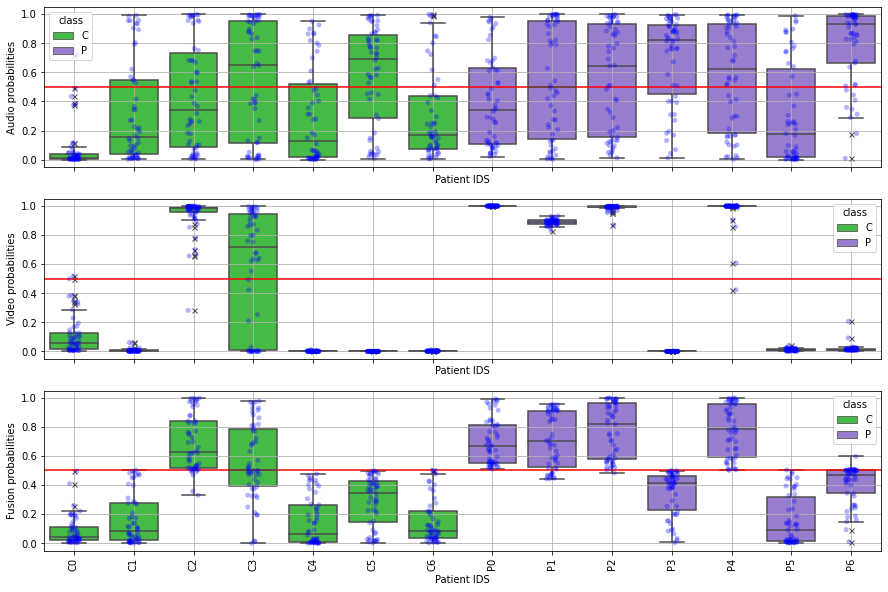

In [3]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv'
save_name  = 'Patients words'

view_results(audio_path)
view_results(video_path)

generate_final_visualization(audio_path,
                             video_path,
                             save_name,
                             'Patient IDS')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Petaca'),
  Text(1, 0, 'Bodega'),
  Text(2, 0, 'Pato'),
  Text(3, 0, 'Apto'),
  Text(4, 0, 'Campana'),
  Text(5, 0, 'Presa'),
  Text(6, 0, 'Plato'),
  Text(7, 0, 'Acariciar'),
  Text(8, 0, 'Aplaudir'),
  Text(9, 0, 'Agarrar'),
  Text(10, 0, 'Dibujar'),
  Text(11, 0, 'Barco'),
  Text(12, 0, 'Bosque'),
  Text(13, 0, 'Ciudad'),
  Text(14, 0, 'Establo'),
  Text(15, 0, 'Hospital'),
  Text(16, 0, 'Luna'),
  Text(17, 0, 'Montaña')])

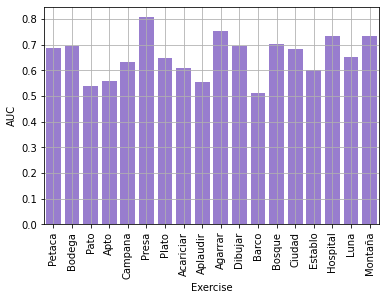

In [7]:
Exercises = ['Petaca', 'Bodega', 'Pato', 'Apto', 'Campana', 'Presa', 'Plato', 'Acariciar', 'Aplaudir', 'Agarrar', 'Dibujar', 'Barco', 'Bosque', 'Ciudad', 'Establo', 'Hospital', 'Luna', 'Montaña']
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Words-duration_size:False.csv',
                             exercise,
                             'Audio',
                             aucs)
data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

data_plot = pd.DataFrame(data_plot)

g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple")
g.grid(0.2)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Petaca'),
  Text(1, 0, 'Bodega'),
  Text(2, 0, 'Pato'),
  Text(3, 0, 'Apto'),
  Text(4, 0, 'Campana'),
  Text(5, 0, 'Presa'),
  Text(6, 0, 'Plato'),
  Text(7, 0, 'Acariciar'),
  Text(8, 0, 'Aplaudir'),
  Text(9, 0, 'Agarrar'),
  Text(10, 0, 'Dibujar'),
  Text(11, 0, 'Barco'),
  Text(12, 0, 'Bosque'),
  Text(13, 0, 'Ciudad'),
  Text(14, 0, 'Establo'),
  Text(15, 0, 'Hospital'),
  Text(16, 0, 'Luna'),
  Text(17, 0, 'Montaña')])

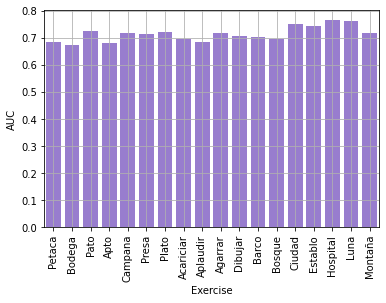

In [8]:
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix('Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:20-Exercise:Words-duration_size:False.csv',
                             exercise,
                             'Video',
                             aucs)

data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

data_plot = pd.DataFrame(data_plot)

g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple")
g.grid(0.2)
plt.xticks(rotation=90)

# Phonemes

Precision:0.6731, Recall:0.5556, F1-score:0.6087, Accuracy:0.6429, AUC:0.6644
Precision:0.7391, Recall:0.5397, F1-score:0.6239, Accuracy:0.6746, AUC:0.7506


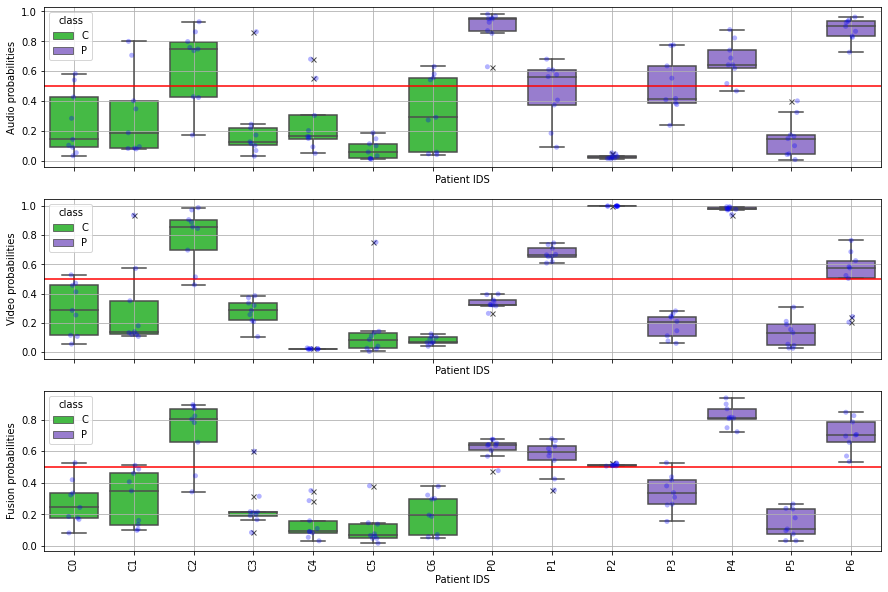

In [4]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv'
save_name  = 'Patients phonemes'

view_results(audio_path)
view_results(video_path)

generate_final_visualization(audio_path,
                             video_path,
                             save_name,
                             'Patient IDS')

(array([0, 1, 2]),
 [Text(0, 0, 'Pataka'), Text(1, 0, 'Pakata'), Text(2, 0, 'Petaka')])

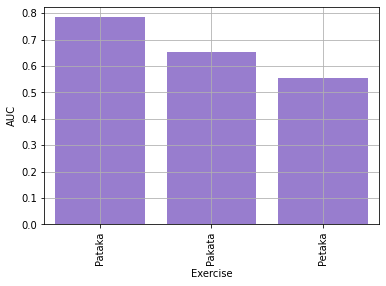

In [5]:
Exercises = ['Pataka', 'Pakata', 'Petaka']
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix(audio_path,
                             exercise,
                             'Audio',
                             aucs)

data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

data_plot = pd.DataFrame(data_plot)

g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple")
g.grid(0.2)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Pataka'), Text(1, 0, 'Pakata'), Text(2, 0, 'Petaka')])

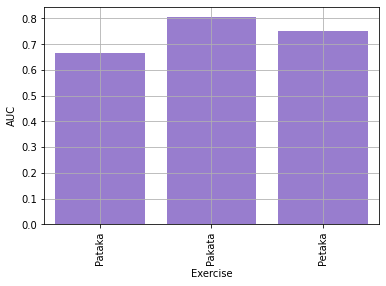

In [6]:
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix(video_path,
                             exercise,
                             'Video',
                             aucs)

data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

data_plot = pd.DataFrame(data_plot)

g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple")
g.grid(0.2)
plt.xticks(rotation=90)

# Vowels

Precision:0.8750, Recall:0.4000, F1-score:0.5490, Accuracy:0.6667, AUC:0.7156
Precision:0.4964, Recall:0.6571, F1-score:0.5656, Accuracy:0.4879, AUC:0.4500


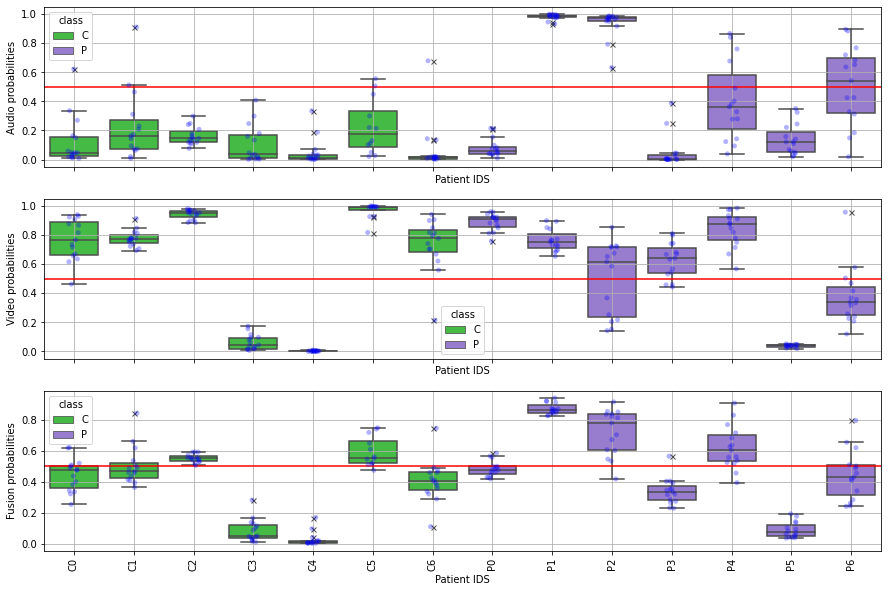

In [7]:
audio_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:7e-05-Epoch:7-Exercise:Vowels-duration_size:False.csv'
video_path = 'Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Vowels-duration_size:False.csv'
save_name  = 'Patients vowels'

view_results(audio_path)
view_results(video_path)

generate_final_visualization(audio_path,
                             video_path,
                             save_name,
                             'Patient IDS')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'E'),
  Text(2, 0, 'I'),
  Text(3, 0, 'O'),
  Text(4, 0, 'U')])

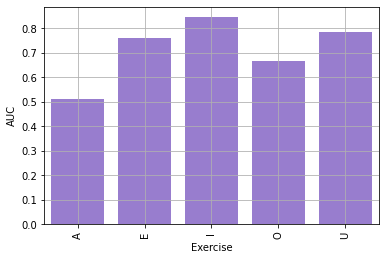

In [8]:
Exercises = ['A', 'E', 'I', 'O', 'U']
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix(audio_path,
                             exercise,
                             'Audio',
                             aucs)

data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

data_plot = pd.DataFrame(data_plot)

g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple")
g.grid(0.2)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'E'),
  Text(2, 0, 'I'),
  Text(3, 0, 'O'),
  Text(4, 0, 'U')])

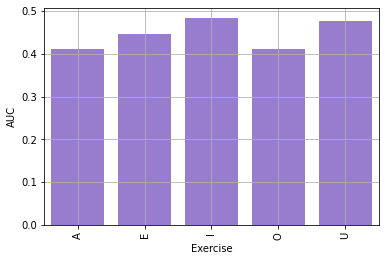

In [10]:
aucs      = {}
for exercise in Exercises:
    generate_confusion_matix(video_path,
                             exercise,
                             'Video',
                             aucs)

data_plot = {'AUC':[], 'Exercise':[]}
for exercise in Exercises:
    data_plot['AUC'].append(aucs[exercise])
    data_plot['Exercise'].append(exercise)

data_plot = pd.DataFrame(data_plot)

g = sns.barplot(data=data_plot, x="Exercise", y="AUC", color="mediumpurple")
g.grid(0.2)
plt.xticks(rotation=90)

In [23]:
import pandas  as pd
import seaborn as sns
import numpy   as np

import matplotlib.pyplot as plt

video = pd.read_csv('Results/Note:VIDEO:LOO_data_v2_load_frames_v2-Lr:0.001-Epoch:10-Exercise:Phonemes-duration_size:False.csv')
video = video[video['Sample_ids'] == 'C1']
audio = pd.read_csv('Results/Note:AUDIO:LOO_data_v2-Lr:1e-05-Epoch:10-Exercise:Phonemes-duration_size:False.csv')
audio = audio[audio['Sample_ids'] == 'C1']

video = video['PK_props'].values.reshape(9,1)
audio = audio['PK_props'].values.reshape(9,1)
fusion =list(np.mean((video, audio), axis=0)[:,0])

video = list(video[:,0])
audio = list(audio[:,0])

video_l, audio_l, fusion_l = [], [], []
for i in range(9):
    video_l.append('Video')
    audio_l.append('Audio')
    fusion_l.append('Fusion')

data = pd.DataFrame({'Probability': audio + video + fusion,
                    'Modality': audio_l + video_l + fusion_l})

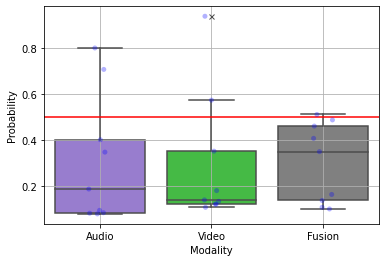

In [24]:
sns.stripplot(x = 'Modality', y = 'Probability', data=data, marker="o", alpha=0.3, color="blue")
g = sns.boxplot(x = 'Modality', y = 'Probability', data=data, palette=["mediumpurple", 'limegreen', 'grey'], dodge=False, flierprops={"marker": "x"})
g.axhline(0.5, color='r')
g.grid(0.2)
plt.savefig('Images/{}.pdf'.format('Fusion exmaple'))